# Heart Attack Analysis & Prediction Dataset

# Introduction

## Data description:

This dataset is designed for the predictive analysis of heart attack occurrences and is hosted on Kaggle. It comprises data from 303 individuals, structured into 14 different features, each aiming to shed light on various aspects relevant to heart health and disease prediction. 

The primary objective of this dataset is to facilitate the development and testing of machine learning models that can accurately predict the likelihood of a heart attack occurring in individuals based on the provided features. The classification task focuses on distinguishing between the presence and absence of heart disease, making it a valuable resource for researchers and practitioners in the field of medical diagnostics and predictive analytics.

## Features Description:

#### 1. Categorical Attributes:
- **sex** - The sex of the individual; 1 = male; 0 = female
- **cp** (chest pain type) - The type of chest pain experienced by the individual, categorized into different types: 
    - Value 0: typical angina
    - Value 1: atypical angina
    - Value 2: non-anginal pain
    - Value 3: asymptomatic
- **fbs** (Fasting Blood Sugar) - The fasting blood sugar of an individual is higher than 120 mg/dl (1 = true; 0 = false).
- **rest_ecg** (Resting Electrocardiographic results) - Results of the resting electrocardiogram measurements:
    - Value 0: normal
    - Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    - Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
- **exang** (Exercise Induced Angina) - Whether the individual experiences angina (chest pain) induced by exercise (1 = Yes, 0 = No).
- **slp**  (Slope) - The slope of the peak exercise ST segment:
    - Value 0: Upsloping
    - Value 1: Flat
    - Value 2: Downsloping
- **caa** (Number of major vessels colored by fluoroscopy) - The number of major vessels (0-3) colored by fluoroscopy.
- **thall** (Thalassemia) - A blood disorder called Thalassemia, encoded in specific categories:
    - Value 0: NULL 
    - Value 1: fixed defect (no blood flow in some part of the heart)
    - Value 2: normal blood flow
    - Value 3: reversible defect (a blood flow is observed but it is not normal)
- **output** - The classification target, indicating the presence (1) or absence (0) of heart disease.

#### 2. Continuous Attributes:
- **age** - The age of the individual.
- **trtbps** (Resting Blood Pressure) - The resting blood pressure of an individual in mm Hg.
- **chol** (Serum Cholesterol) - The individual's serum cholesterol in mg/dl.
- **thalachh**  (Maximum Heart Rate achieved) - The maximum heart rate achieved by an individual.
- **oldpeak** - ST depression induced by exercise relative to rest.

# Fetching Data

## Import packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report
from sklearn import tree
import numpy as np
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras import layers
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau, Callback
from sklearn.model_selection import KFold
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, PReLU
from tensorflow.keras.optimizers import Adam
import xgboost as xgb
from sklearn.model_selection import StratifiedKFold
from keras.layers import Dropout
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.initializers import HeNormal
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression


## Import data

In [2]:
#df = pd.set_option('display.max_rows', None)

In [3]:
df = pd.read_csv("heart.csv")

In [4]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
df.tail()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
df.shape

(303, 14)

In [8]:
df.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

In [9]:
for col in df.columns:
    print('{} : {}'.format(col, df[col].unique()))

age : [63 37 41 56 57 44 52 54 48 49 64 58 50 66 43 69 59 42 61 40 71 51 65 53
 46 45 39 47 62 34 35 29 55 60 67 68 74 76 70 38 77]
sex : [1 0]
cp : [3 2 1 0]
trtbps : [145 130 120 140 172 150 110 135 160 105 125 142 155 104 138 128 108 134
 122 115 118 100 124  94 112 102 152 101 132 148 178 129 180 136 126 106
 156 170 146 117 200 165 174 192 144 123 154 114 164]
chol : [233 250 204 236 354 192 294 263 199 168 239 275 266 211 283 219 340 226
 247 234 243 302 212 175 417 197 198 177 273 213 304 232 269 360 308 245
 208 264 321 325 235 257 216 256 231 141 252 201 222 260 182 303 265 309
 186 203 183 220 209 258 227 261 221 205 240 318 298 564 277 214 248 255
 207 223 288 160 394 315 246 244 270 195 196 254 126 313 262 215 193 271
 268 267 210 295 306 178 242 180 228 149 278 253 342 157 286 229 284 224
 206 167 230 335 276 353 225 330 290 172 305 188 282 185 326 274 164 307
 249 341 407 217 174 281 289 322 299 300 293 184 409 259 200 327 237 218
 319 166 311 169 187 176 241 131]
fbs : [

# Data cleaning

## Duplicated values

In [10]:
duplicates_df = df[df.duplicated(keep=False)]

In [11]:
duplicates_df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
163,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


Within the dataset, an occurrence of duplicated values has been identified, which could potentially skew the results and affect the accuracy of any predictive analysis conducted. To address this issue, we will implement a data cleaning step focused on removing duplicated record.

In [12]:
df.drop_duplicates(inplace=True)

In [13]:
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


## NaN and unknown values

In [14]:
null_counts = df.isnull().sum()

In [15]:
null_counts

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In the process of preparing our dataset for analysis, special attention is required for the handling of the thall and caa columns due to inconsistencies in their value ranges.

- For the thall (Thalassemia) column, the valid categories are represented by the values 1 through 3, which correspond to different types of Thalassemia conditions. It has been observed that this column also contains entries marked as 0, indicating data that does not fall within the expected range of categories. These rows do not align with the defined categories and, as such, will be removed from the dataset to maintain the integrity of the analysis.

- The caa (Number of major vessels colored by fluoroscopy) column is expected to contain values ranging from 0 to 3, which indicate the number of major vessels identified. An anomaly arises with the presence of value 4 within this column, a figure that falls outside the prescribed range. To ensure the accuracy of our predictive modeling, rows containing a caa value of 4 will be excluded from the dataset.

In [16]:
df[df['thall'] == 0]

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
48,53,0,2,128,216,0,0,115,0,0.0,2,0,0,1
281,52,1,0,128,204,1,1,156,1,1.0,1,0,0,0


In [17]:
df[df['caa'] == 4]

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
92,52,1,2,138,223,0,1,169,0,0.0,2,4,2,1
158,58,1,1,125,220,0,1,144,0,0.4,1,4,3,1
163,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
251,43,1,0,132,247,1,0,143,1,0.1,1,4,3,0


In [18]:
df = df[df['thall'] != 0]

In [19]:
df = df[df['caa'] != 4]

In [20]:
df.shape

(296, 14)

# Summary

## Summary statistics for numeric attribute

In [21]:
categorical_attributes = ['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall']

In [22]:
continuous_attributes = ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']

In [23]:
df[continuous_attributes].describe()

,age,trtbps,chol,thalachh,oldpeak
count,296.000000,296.00000,296.000000,296.000000,296.000000
mean,54.523649,131.60473,247.155405,149.560811,1.059122
std,9.059471,17.72662,51.977011,22.970792,1.166474
min,29.000000,94.00000,126.000000,71.000000,0.000000
25%,48.000000,120.00000,211.000000,133.000000,0.000000
50%,56.000000,130.00000,242.500000,152.500000,0.800000
75%,61.000000,140.00000,275.250000,166.000000,1.650000
max,77.000000,200.00000,564.000000,202.000000,6.200000


**Sample Size**: The data for each of the variables 'age', 'trtbps', 'chol', 'thalachh', and 'oldpeak' consists of 296 observations, indicating that the summary statistics are based on a substantial sample size, which is beneficial for analysis.

**Age Distribution**: The average age in the dataset is approximately 54.5 years, with a standard deviation of about 9.06, indicating moderate variability in the ages of individuals. The minimum and maximum ages are 29 and 77 years, respectively, showing a wide age range in the dataset.

**Resting Blood Pressure (trtbps)**: The average resting blood pressure (trtbps) is around 131.60 mm Hg with a standard deviation of 17.72 mm Hg. This suggests there's some variability but not extremely high. The range of this parameter is quite extensive, from 94 to 200 mm Hg, which could indicate a diverse set of individuals with varying blood pressure levels.

**Cholesterol Levels (chol)**: Cholesterol levels have a mean value of 247.15 mg/dl and also present with moderate variability (standard deviation of 51.97 mg/dl). The range is notably wide, spanning from 126 to 564 mg/dl, indicating the presence of both healthy and high-risk individuals in terms of cholesterol.

**Maximum Heart Rate (thalachh)**: The average maximum heart rate recorded is 149.5 bpm with a standard deviation of approximately 22.97 bpm, suggesting that there's a fair amount of variation in heart rate among individuals. The maximum heart rate observed is 202 bpm, which is high and might be of interest when assessing cardiovascular stress.

**ST Depression (oldpeak)**: The mean ST depression is 1.06, with a standard deviation of 1.16, indicating that the values are spread out and some individuals may have significant ST depression, a possible indicator of heart disease. The maximum recorded ST depression is 6.2, which is considerably high and might suggest serious clinical findings for those individuals.

In [24]:
for col in categorical_attributes:
    df[col] = df[col].astype('category')

categorical_summary = df[categorical_attributes].describe()
categorical_summary

,sex,cp,fbs,restecg,exng,slp,caa,thall
count,296,296,296,296,296,296,296,296
unique,2,4,2,3,2,3,4,3
top,1,0,0,1,0,2,0,2
freq,201,141,253,147,199,138,173,163


**Sex Distribution**: The dataset predominantly consists of male participants (sex = 1), with males appearing 201 times. This suggests that any analysis or predictive modeling performed with this data may be more reflective of the male population's heart health.

**Chest Pain Type (cp)**: The most common type of chest pain reported is 'typical angina' (value 0), with 141 occurrences. This indicates that a significant portion of the individuals have experienced the most common form of chest pain associated with heart disease.

**Fasting Blood Sugar (fbs)**: A vast majority of the individuals have fasting blood sugar below 120 mg/dl (fbs = 0), which is indicated by its high frequency of 253. This suggests that elevated fasting blood sugar is not a common characteristic in this particular dataset.

**Resting Electrocardiographic Results (rest_ecg)**: The most frequently observed electrocardiographic result is 'having ST-T wave abnormality' (value 1), which occurred in 147 cases. This may point to a prevalent electrocardiographic abnormality within the cohort.

**Exercise Induced Angina (exang)**: Exercise did not induce angina in most individuals (exang = 0), with this condition occurring 199 times in the dataset. This indicates that exercise-induced angina is not a common symptom among the individuals studied.

**Slope of the Peak Exercise ST Segment (slp)**: The 'downsloping' slope (value 2) of the peak exercise ST segment is the most frequent, with 138 occurrences. The slope of the ST segment is an important marker for heart disease, and a downsloping ST segment can often indicate higher cardiac risk.

**Number of Major Vessels Colored by Fluoroscopy (caa)**: The most common observation is that individuals have no major vessels colored by fluoroscopy (caa = 0), with this being recorded 173 times. This may suggest that many individuals in this group do not have significant blockages in their major vessels.

**Thalassemia (thall)**: The most frequent category for thalassemia is 'normal blood flow' (value 2), noted 163 times in the dataset, suggesting that abnormal thalassemia conditions are less common among the participants.

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 296 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       296 non-null    int64   
 1   sex       296 non-null    category
 2   cp        296 non-null    category
 3   trtbps    296 non-null    int64   
 4   chol      296 non-null    int64   
 5   fbs       296 non-null    category
 6   restecg   296 non-null    category
 7   thalachh  296 non-null    int64   
 8   exng      296 non-null    category
 9   oldpeak   296 non-null    float64 
 10  slp       296 non-null    category
 11  caa       296 non-null    category
 12  thall     296 non-null    category
 13  output    296 non-null    int64   
dtypes: category(8), float64(1), int64(5)
memory usage: 19.6 KB


# EDA

In [26]:
print('Skewness:', df[continuous_attributes].skew())
print('Kurtosis:', df[continuous_attributes].kurt())

Skewness: age        -0.214413
trtbps      0.710759
chol        1.129905
thalachh   -0.531671
oldpeak     1.243552
dtype: float64
Kurtosis: age        -0.526235
trtbps      0.857300
chol        4.493553
thalachh   -0.060678
oldpeak     1.503293
dtype: float64


**Skewness of Age**: The age distribution shows a slight negative skewness (-0.214413), suggesting a distribution that has a longer left tail, with a majority of the population being younger.

**Skewness of trtbps (Resting Blood Pressure)**: The resting blood pressure is slightly positively skewed (0.717857), indicating a longer right tail in the distribution where a smaller number of individuals have higher blood pressure.

**Skewness of chol (Serum Cholesterol)**: Cholesterol levels are significantly positively skewed (1.129295), which means that the distribution has a longer right tail. This implies that more individuals have cholesterol levels that are lower than the mode, with fewer individuals having very high cholesterol levels.

**Skewness of thalachh (Maximum Heart Rate Achieved)**: The maximum heart rate achieved shows a slight negative skew (-0.531567), suggesting that more individuals have higher maximum heart rates, with the distribution tailing off for lower maximum heart rates.

**Skewness of oldpeak (ST Depression Induced by Exercise Relative to Rest)**: The oldpeak has a positive skewness of 1.243552, indicating a distribution with more individuals having lower ST depression values and a longer tail on the higher values side.

**Kurtosis of Age**: The age has a negative kurtosis (-0.526235), which suggests a flatter peak compared to a normal distribution, implying a distribution with lighter tails.

**Kurtosis of trtbps**: The kurtosis value for resting blood pressure (0.857300) suggests a relatively normal distribution, as it is close to zero, indicating that the tails are neither particularly heavy nor light.

**Kurtosis of chol**: Cholesterol levels have a high positive kurtosis (4.495853), indicating a distribution with heavier tails and a sharper peak, which means there are more outliers with extremely high or low cholesterol levels than would be expected in a normal distribution.

**Kurtosis of thalachh**: The kurtosis value for thalachh (-0.065778) is close to zero, which suggests a distribution similar to normal in terms of the weight of its tails.

**Kurtosis of oldpeak**: The oldpeak shows a positive kurtosis of 1.503293, suggesting a leptokurtic distribution. This indicates that the oldpeak distribution has heavier tails than a normal distribution, with more extreme values.

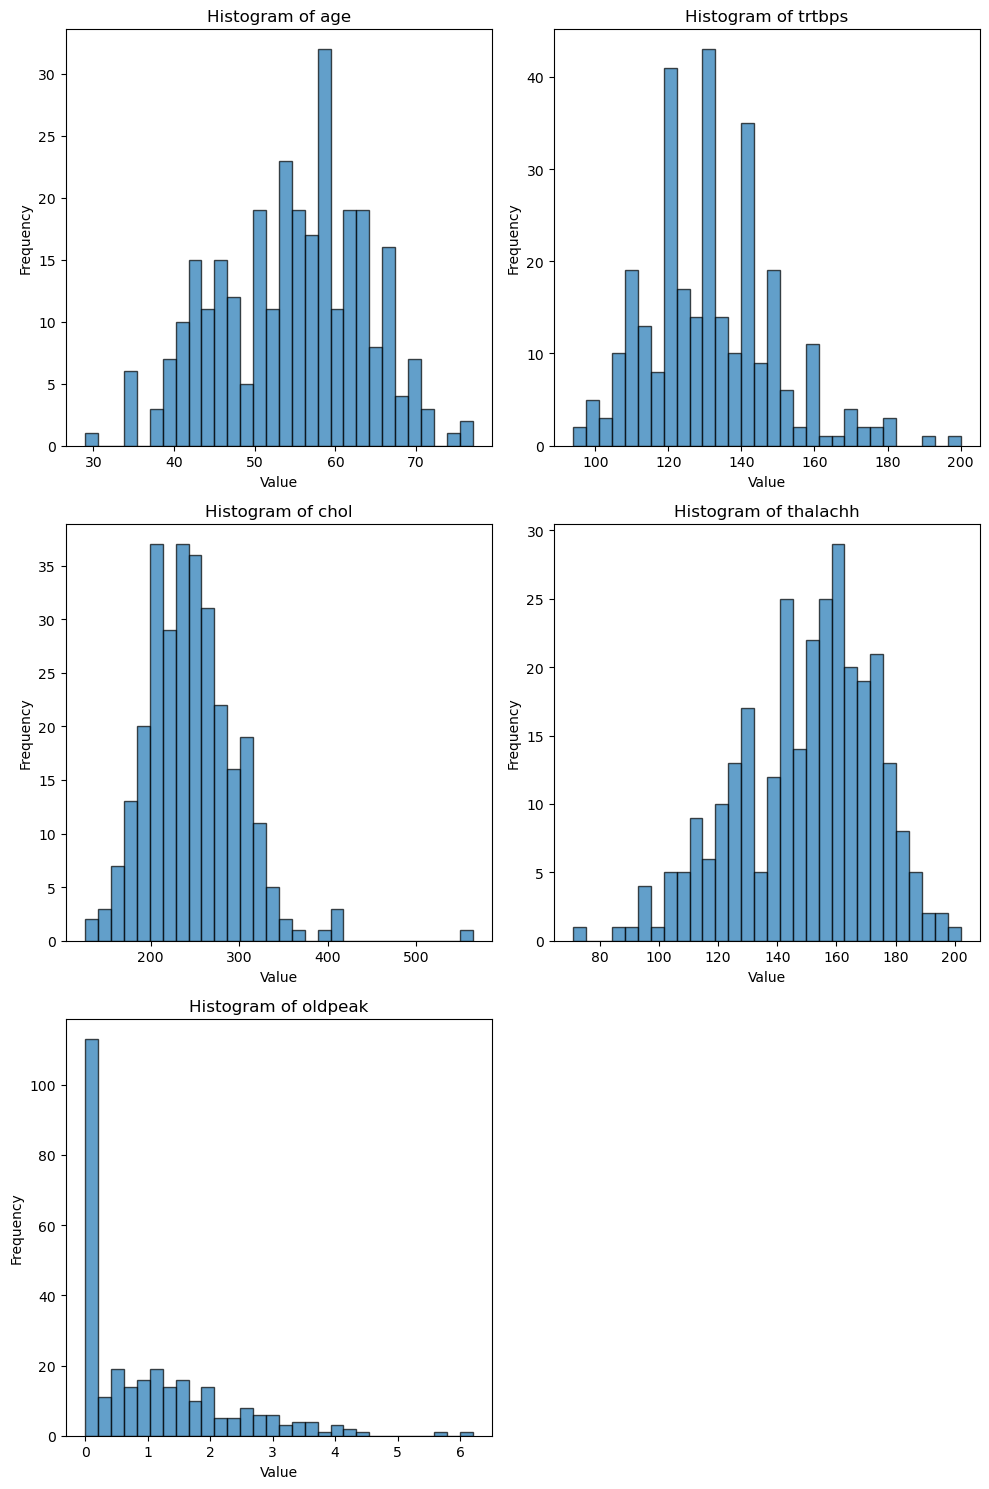

In [27]:
n_vars = len(continuous_attributes)
cols = 2
rows = n_vars // cols + (n_vars % cols > 0)

fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(10, 5 * rows))

axes = axes.flatten()

for i, var in enumerate(continuous_attributes):
    axes[i].hist(df[var], bins=30, edgecolor='k', alpha=0.7)
    axes[i].set_title(f'Histogram of {var}')
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')

for j in range(i+1, rows * cols):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

**Age**: The age distribution appears to be roughly normally distributed with a slight left skew. The most common age range is the 50s to 60s. This slight skew could correspond to the negative skewness value previously mentioned.

**Resting Blood Pressure (trtbps)**: The histogram for trtbps shows a right-skewed distribution with a concentration of values in the 120-140 mm Hg range. There are also a noticeable number of individuals with high resting blood pressure, stretching towards the 200 mm Hg mark.

**Serum Cholesterol (chol)**: The distribution of cholesterol levels is also right-skewed. The bulk of the values fall between 200 and 300 mg/dl. There are fewer individuals with very high cholesterol levels, but the distribution suggests that high cholesterol is more common than very low cholesterol in this dataset.

**Maximum Heart Rate Achieved (thalachh)**: This variable shows a slight left skew in its distribution. Most individuals' maximum heart rates are concentrated around 140-160 bpm. The range suggests a wide variation in heart rate responses among the individuals in this dataset.

**ST Depression (oldpeak)**: The histogram for oldpeak displays a highly right-skewed distribution. The majority of values are close to 0, which suggests that most individuals do not exhibit a significant ST depression during exercise. However, there are a few cases with high oldpeak values, indicating more pronounced exercise-induced ST depression in those individuals.

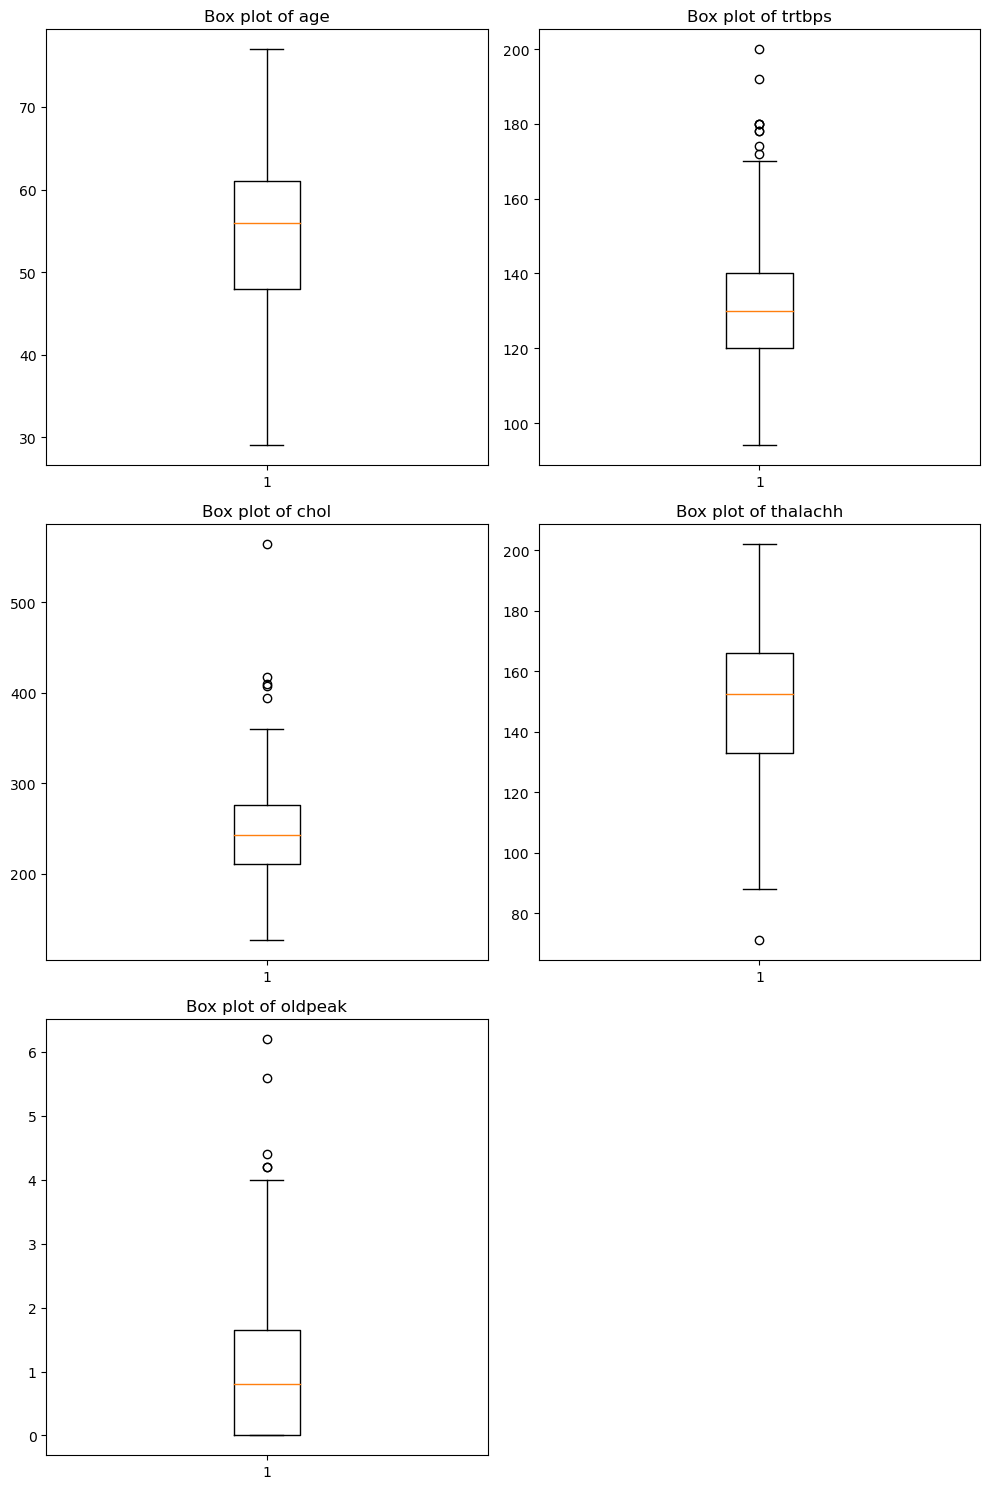

In [28]:
n_vars = len(continuous_attributes)
cols = 2
rows = n_vars // cols + (n_vars % cols > 0)

fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(10, 5 * rows))

axes = axes.flatten()

for i, var in enumerate(continuous_attributes):
    axes[i].boxplot(x=df[var])
    axes[i].set_title(f'Box plot of {var}')

for j in range(i+1, rows * cols):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

**Age Distribution**: The box plot for age shows a relatively symmetrical distribution, with the median line near the center of the box. This suggests a balanced distribution around the median age. There are no outliers, which indicates a relatively homogeneous age distribution within the interquartile range.

**Resting Blood Pressure (trtbps)**: The box plot for trtbps indicates a median below 140 mm Hg, with a few outliers on the higher end. This reflects a right-skewed distribution with some individuals having unusually high resting blood pressure values.

**Serum Cholesterol (chol)**: The chol box plot also displays a right-skewed distribution, with the median cholesterol level falling around the middle of the interquartile range. Several outliers are present, indicating that some individuals have exceptionally high cholesterol levels, significantly above the rest of the population.

**Maximum Heart Rate Achieved (thalachh)**: The distribution of thalachh appears slightly left-skewed, with the median towards the upper end of the box. There is one outlier on the lower end, suggesting an individual with an unusually low maximum heart rate.

**ST Depression (oldpeak)**: The oldpeak box plot is notably right-skewed with many outliers, which corresponds to the previously mentioned skewness value. This reflects that while most individuals have low ST depression values, there are a few cases with high values.

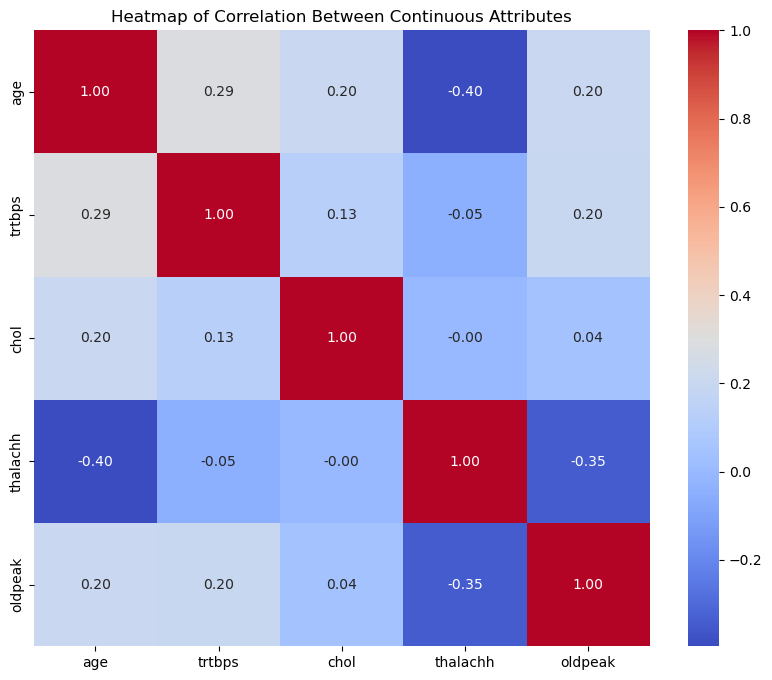

In [29]:
corr_matrix = df[continuous_attributes].corr()

plt.figure(figsize=(10, 8)) 
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Heatmap of Correlation Between Continuous Attributes')
plt.show()

**Age and Maximum Heart Rate (thalachh)**: There is a moderate negative correlation (-0.40) between age and thalachh. This suggests that as age increases, the maximum heart rate achieved tends to decrease.

**Resting Blood Pressure (trtbps) and Other Variables**: The correlations between trtbps and all other measured variables are weak, all below 0.30, suggesting that resting blood pressure does not have a strong linear relationship with age, cholesterol levels, maximum heart rate, or ST depression.

**Cholesterol (chol) Correlations**: Cholesterol levels have very weak correlations with all other variables, with coefficients not exceeding 0.20 in absolute value. This implies that cholesterol levels do not vary significantly with age, resting blood pressure, maximum heart rate, or ST depression in this dataset.

**Oldpeak and Thalachh**: There is a moderate negative correlation (-0.35) between oldpeak and thalachh. This could indicate that individuals with a higher maximum heart rate tend to have lower ST depression during exercise.

None of the variables show a strong positive correlation with one another (close to 1.0). The highest positive correlation observed is 0.29 between age and trtbps (resting blood pressure), indicating only a weak to moderate positive relationship. Most variables appear to be quite independent of each other, with correlation coefficients close to zero.

# Decision Tree Model

In [30]:
y = df['output']

In [31]:
X = df.drop(['output'], axis=1)

In [32]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: output, Length: 296, dtype: int64

In [33]:
X

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [34]:
tree_clf = DecisionTreeClassifier(max_depth = 3)

In [35]:
tree_clf.fit(X, y)

DecisionTreeClassifier(max_depth=3)

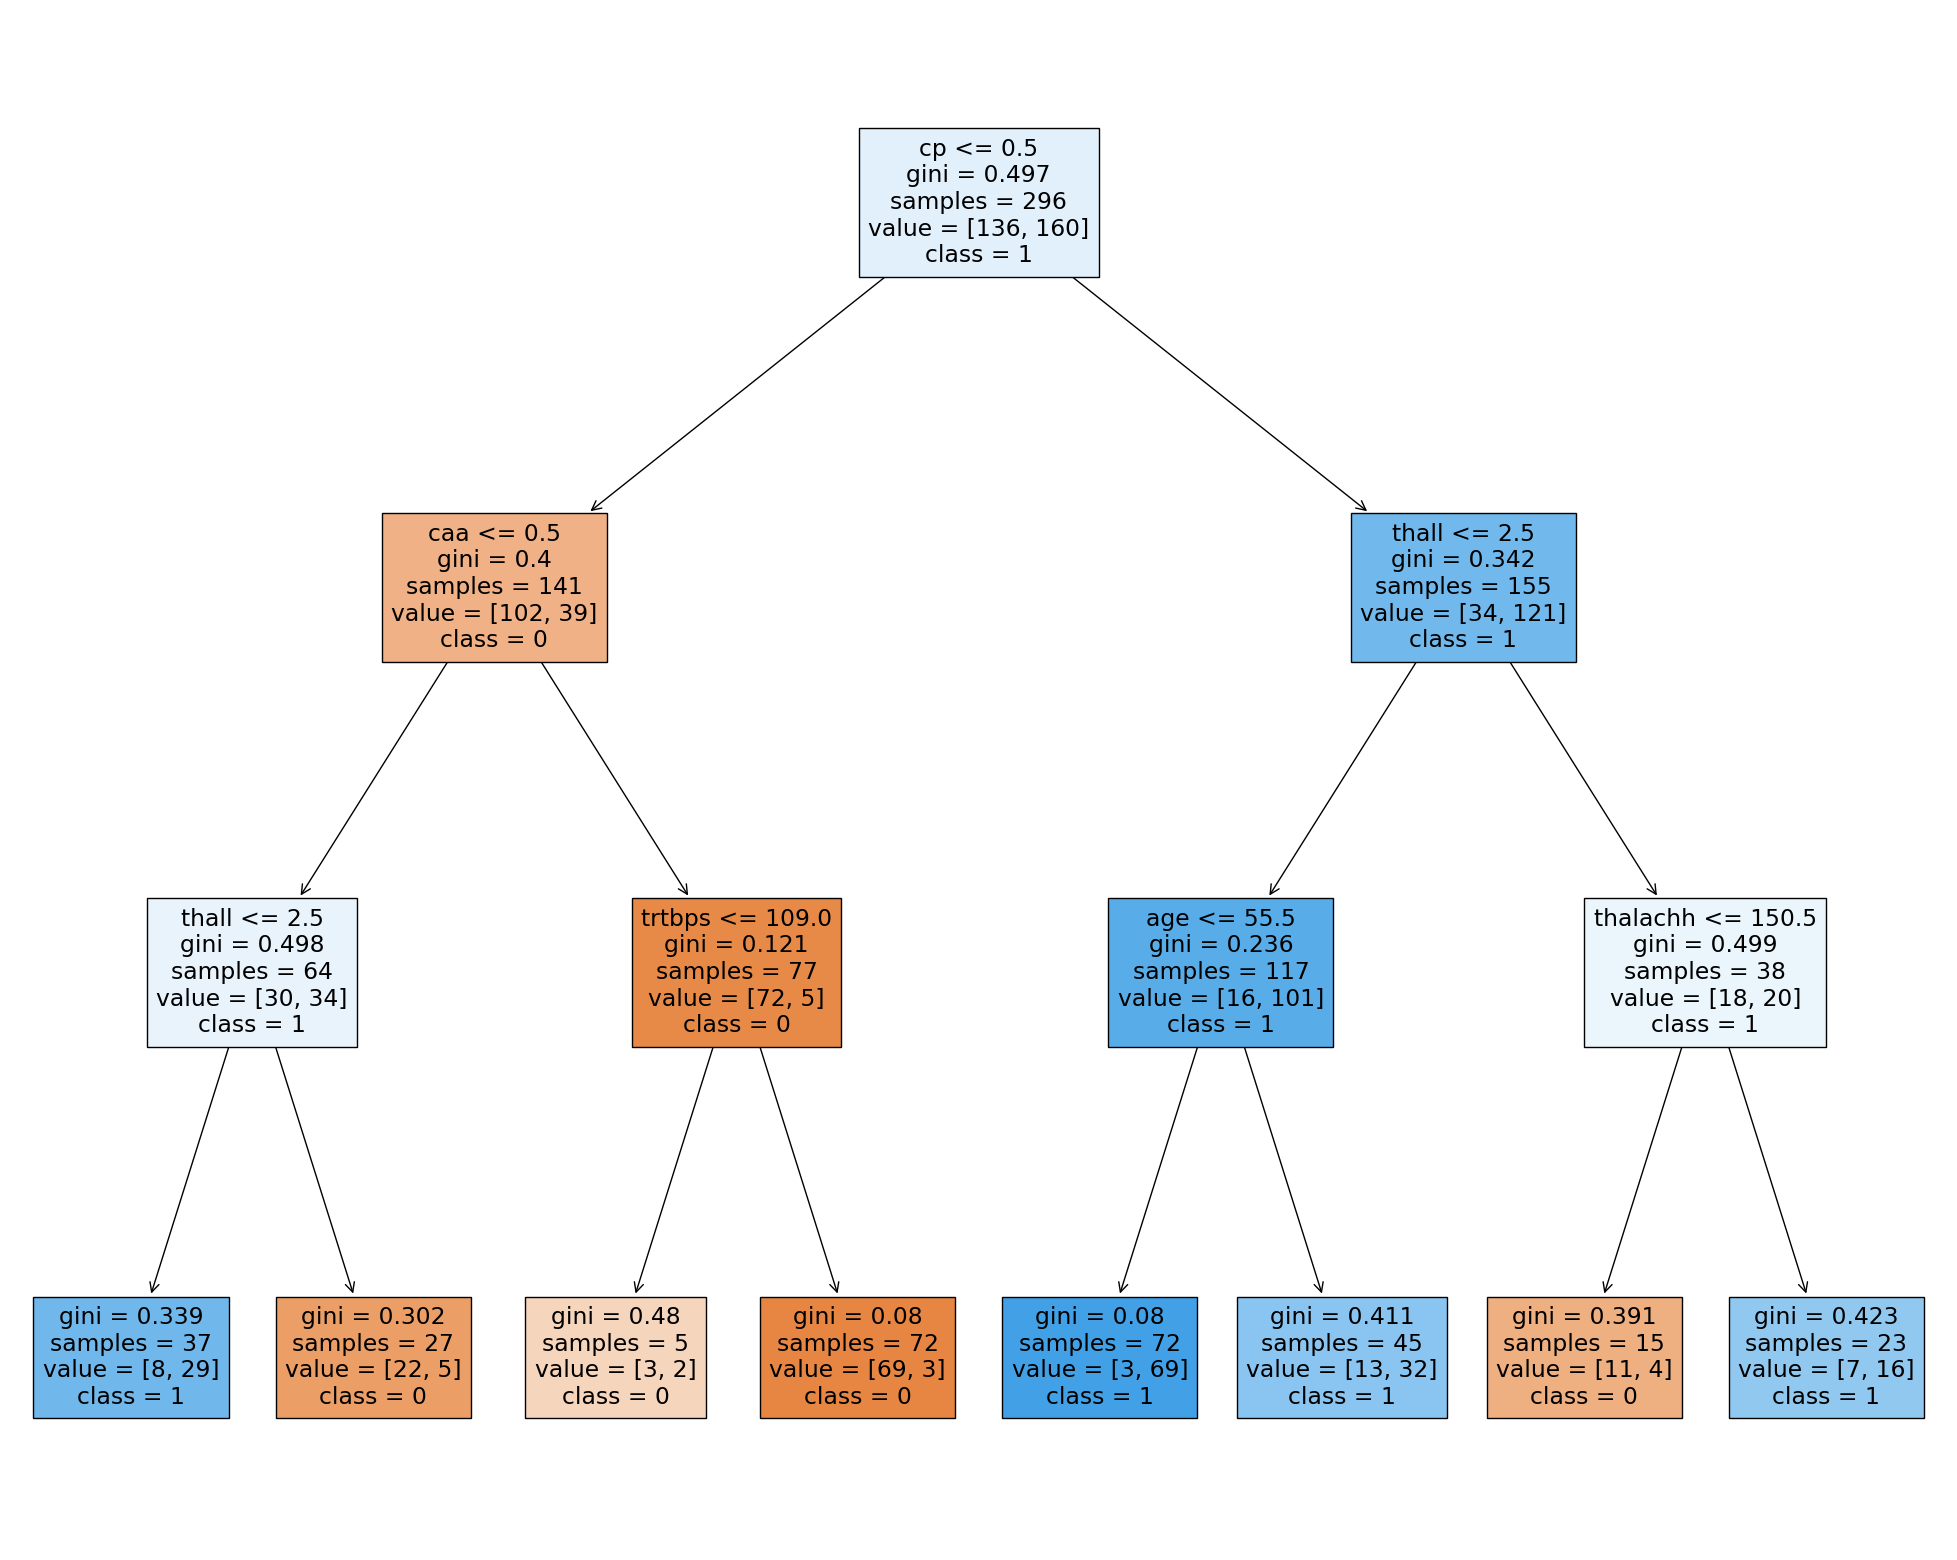

In [36]:
X_columns = df.drop('output', axis=1).columns

unique_y = np.unique(y).astype(str)

fig = plt.figure(figsize=(25,20))
d = tree.plot_tree(tree_clf,
                   feature_names=X_columns,
                   class_names=unique_y,
                   filled=True)

In [37]:
tree_clf_entropy = DecisionTreeClassifier(max_depth = 3, criterion= "entropy")
tree_clf_entropy.fit(X, y)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

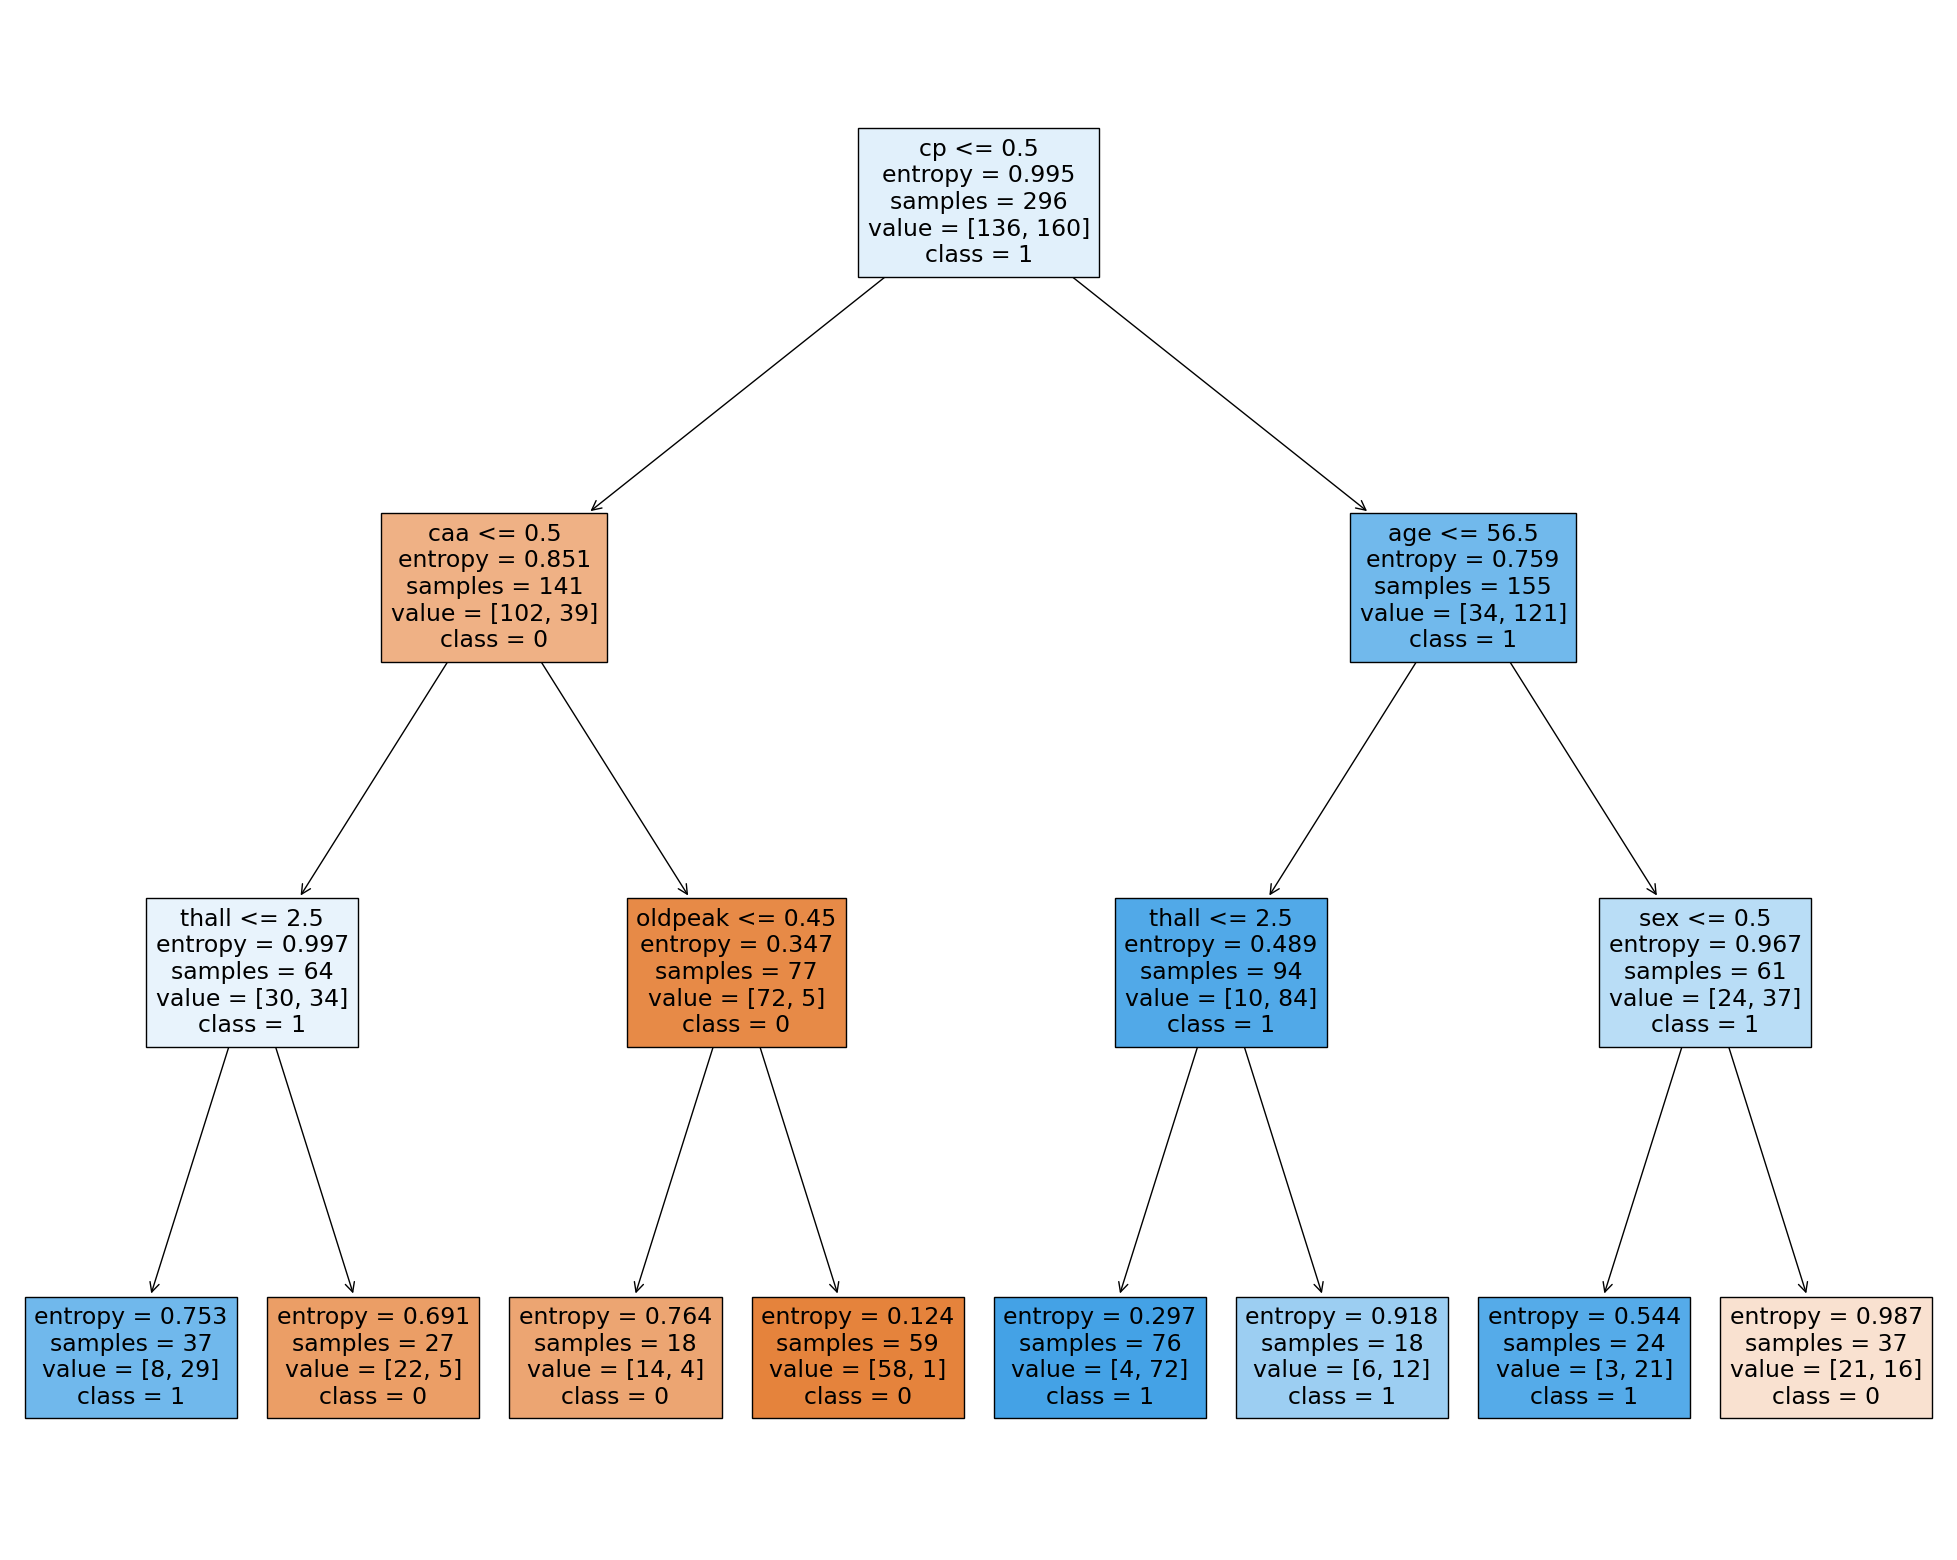

In [38]:
fig = plt.figure(figsize=(25,20))
d_entropy = tree.plot_tree(tree_clf_entropy,
                  feature_names = X_columns,
                  class_names = unique_y,
                  filled = True)

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [40]:
#criterion: gini
def decision_tree(max_depth, X_train, y_train, X_test, y_test):
    tree_clf_val = DecisionTreeClassifier(max_depth=max_depth)
    tree_clf_val.fit(X_train, y_train)
    y_pred = tree_clf_val.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_pred)
    y_train_pred = tree_clf_val.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    scores = cross_val_score(tree_clf_val, X, y, cv=5)
    return train_accuracy, test_accuracy, classification_report(y_test, y_pred), scores, tree_clf_val

In [41]:
#criterion: entropy
def decision_tree_entropy(max_depth, X_train, y_train, X_test, y_test):
    tree_clf_val = DecisionTreeClassifier(max_depth=max_depth, criterion='entropy')
    tree_clf_val.fit(X_train, y_train)
    y_pred = tree_clf_val.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_pred)
    y_train_pred = tree_clf_val.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    scores = cross_val_score(tree_clf_val, X, y, cv=5)
    return train_accuracy, test_accuracy, classification_report(y_test, y_pred), scores, tree_clf_val

In [42]:
train_accuracy, test_accuracy, report, cv_scores, tree_clf_val = decision_tree(3, X_train, y_train, X_test, y_test)

print(f"Training Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")
print(report)
print(f"Cross-validation scores: {cv_scores}")

Training Accuracy: 0.855072463768116
Test Accuracy: 0.8426966292134831
              precision    recall  f1-score   support

           0       0.82      0.77      0.79        35
           1       0.86      0.89      0.87        54

    accuracy                           0.84        89
   macro avg       0.84      0.83      0.83        89
weighted avg       0.84      0.84      0.84        89

Cross-validation scores: [0.8        0.89830508 0.83050847 0.72881356 0.77966102]


In [43]:
train_accuracy, test_accuracy, report, cv_scores, tree_clf_val = decision_tree_entropy(3, X_train, y_train, X_test, y_test)

print(f"Training Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")
print(report)
print(f"Cross-validation scores: {cv_scores}")

Training Accuracy: 0.855072463768116
Test Accuracy: 0.8089887640449438
              precision    recall  f1-score   support

           0       0.74      0.80      0.77        35
           1       0.86      0.81      0.84        54

    accuracy                           0.81        89
   macro avg       0.80      0.81      0.80        89
weighted avg       0.81      0.81      0.81        89

Cross-validation scores: [0.8        0.84745763 0.83050847 0.76271186 0.76271186]


[Text(0.5, 0.875, 'X[2] <= 0.5\nentropy = 1.0\nsamples = 207\nvalue = [101, 106]'),
 Text(0.25, 0.625, 'X[11] <= 0.5\nentropy = 0.799\nsamples = 95\nvalue = [72, 23]'),
 Text(0.125, 0.375, 'X[12] <= 2.5\nentropy = 1.0\nsamples = 38\nvalue = [19, 19]'),
 Text(0.0625, 0.125, 'entropy = 0.702\nsamples = 21\nvalue = [4, 17]'),
 Text(0.1875, 0.125, 'entropy = 0.523\nsamples = 17\nvalue = [15, 2]'),
 Text(0.375, 0.375, 'X[9] <= 0.45\nentropy = 0.367\nsamples = 57\nvalue = [53, 4]'),
 Text(0.3125, 0.125, 'entropy = 0.787\nsamples = 17\nvalue = [13, 4]'),
 Text(0.4375, 0.125, 'entropy = 0.0\nsamples = 40\nvalue = [40, 0]'),
 Text(0.75, 0.625, 'X[0] <= 56.5\nentropy = 0.825\nsamples = 112\nvalue = [29, 83]'),
 Text(0.625, 0.375, 'X[9] <= 1.95\nentropy = 0.538\nsamples = 65\nvalue = [8, 57]'),
 Text(0.5625, 0.125, 'entropy = 0.409\nsamples = 61\nvalue = [5, 56]'),
 Text(0.6875, 0.125, 'entropy = 0.811\nsamples = 4\nvalue = [3, 1]'),
 Text(0.875, 0.375, 'X[1] <= 0.5\nentropy = 0.992\nsamples = 47

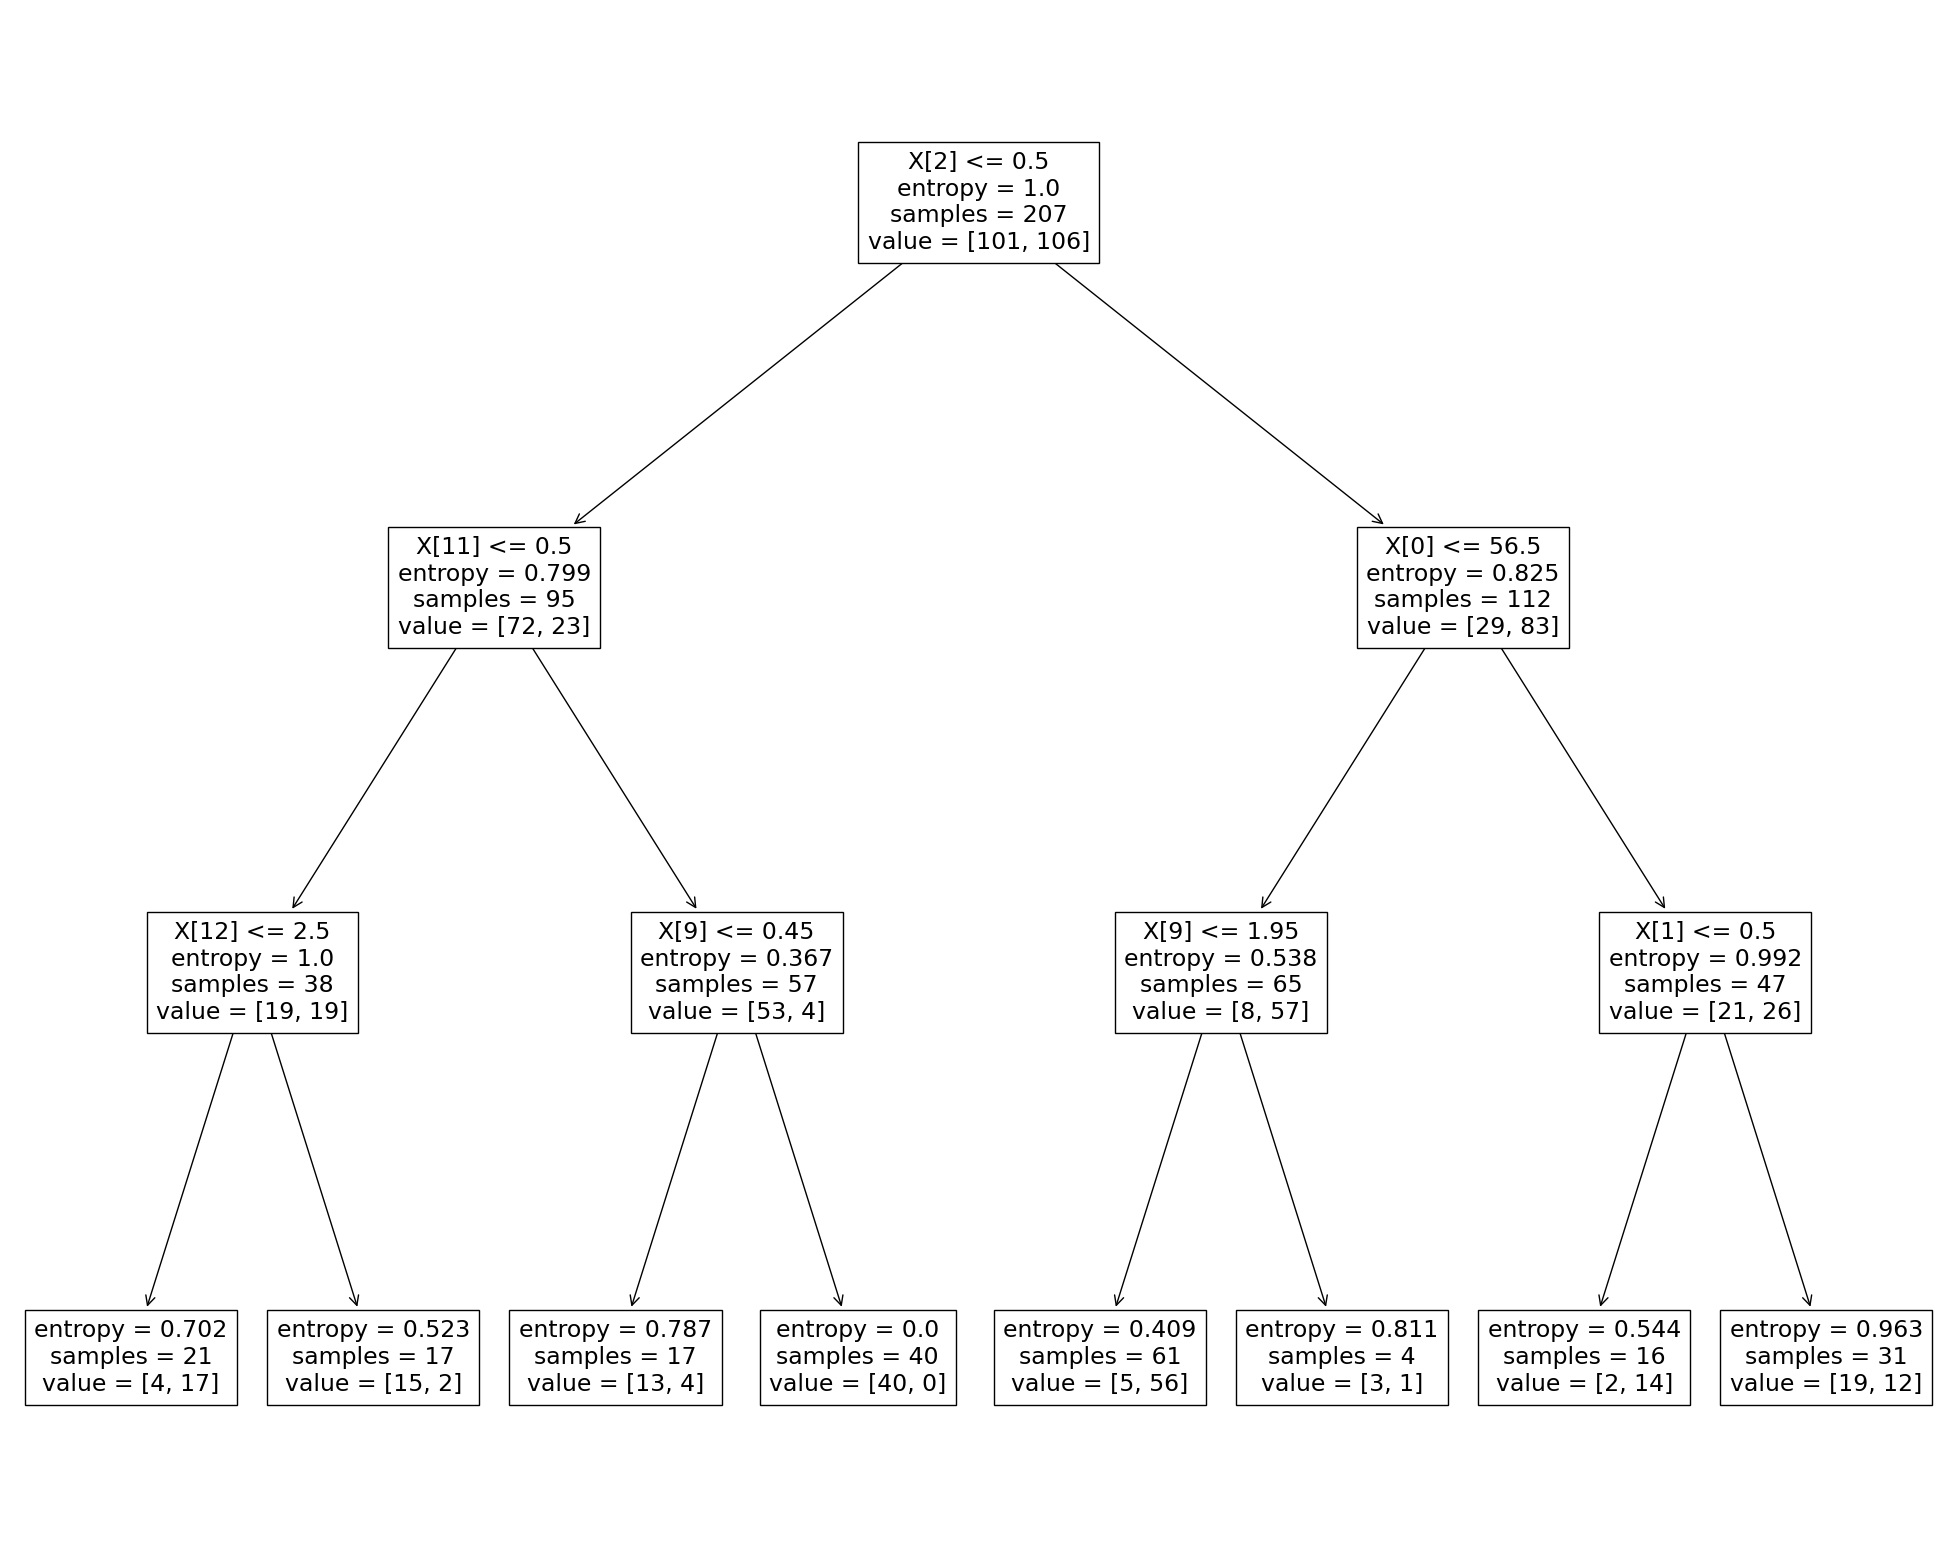

In [44]:
fig = plt.figure(figsize=(25,20))
tree.plot_tree(tree_clf_val)

In [45]:
train_accuracy, test_accuracy, report, cv_scores, tree_clf_val = decision_tree(4, X_train, y_train, X_test, y_test)

print(f"Training Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")
print(report)
print(f"Cross-validation scores: {cv_scores}")

Training Accuracy: 0.893719806763285
Test Accuracy: 0.7865168539325843
              precision    recall  f1-score   support

           0       0.70      0.80      0.75        35
           1       0.86      0.78      0.82        54

    accuracy                           0.79        89
   macro avg       0.78      0.79      0.78        89
weighted avg       0.80      0.79      0.79        89

Cross-validation scores: [0.76666667 0.81355932 0.76271186 0.66101695 0.74576271]


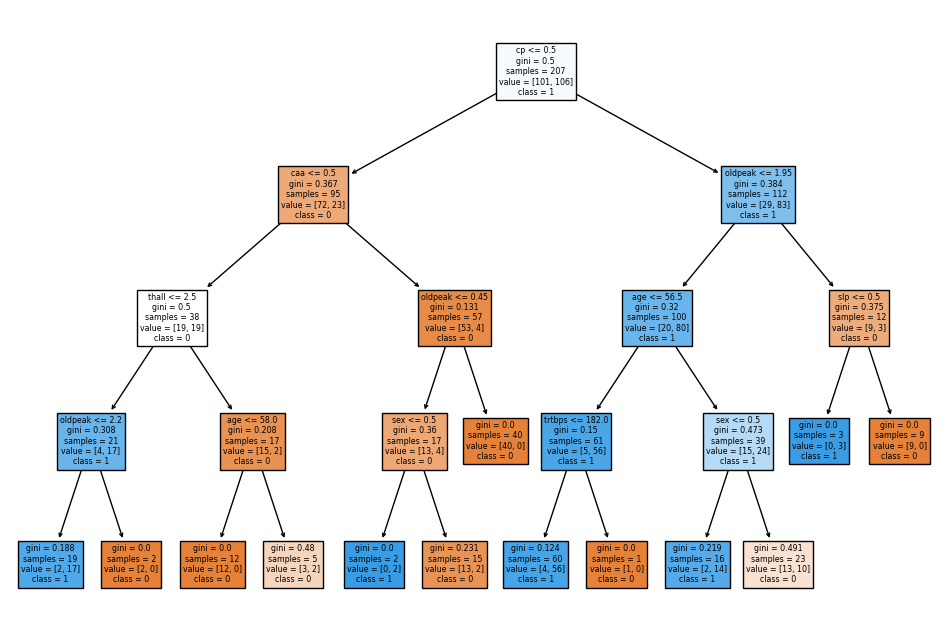

In [46]:
plt.figure(figsize=(12,8))
tree.plot_tree(tree_clf_val, filled=True, feature_names=X_columns, class_names=unique_y)
plt.show()

In [47]:
train_accuracy, test_accuracy, report, cv_scores, tree_clf_val = decision_tree_entropy(4, X_train, y_train, X_test, y_test)

print(f"Training Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")
print(report)
print(f"Cross-validation scores: {cv_scores}")

Training Accuracy: 0.8888888888888888
Test Accuracy: 0.7865168539325843
              precision    recall  f1-score   support

           0       0.69      0.83      0.75        35
           1       0.87      0.76      0.81        54

    accuracy                           0.79        89
   macro avg       0.78      0.79      0.78        89
weighted avg       0.80      0.79      0.79        89

Cross-validation scores: [0.76666667 0.77966102 0.77966102 0.71186441 0.71186441]


In [48]:
print("Feature importances:\n", tree_clf_val.feature_importances_)

Feature importances:
 [0.15154274 0.09441014 0.28164616 0.03268399 0.05794254 0.
 0.         0.         0.04921488 0.10419404 0.         0.12365908
 0.10470643]


In [49]:
print("X_train:", X_train)
print("X_test:", X_test)
print("y_train:", y_train)
print("y_test:", y_test)

X_train:      age sex cp  trtbps  chol fbs restecg  thalachh exng  oldpeak slp caa  \
70    54   1  2     120   258   0       0       147    0      0.4   1   0   
295   63   1  0     140   187   0       0       144    1      4.0   2   2   
170   56   1  2     130   256   1       0       142    1      0.6   1   1   
128   52   0  2     136   196   0       0       169    0      0.1   1   0   
226   62   1  1     120   281   0       0       103    0      1.4   1   1   
..   ...  .. ..     ...   ...  ..     ...       ...  ...      ...  ..  ..   
193   60   1  0     145   282   0       0       142    1      2.8   1   2   
72    29   1  1     130   204   0       0       202    0      0.0   2   0   
108   50   0  1     120   244   0       1       162    0      1.1   2   0   
276   58   1  0     146   218   0       1       105    0      2.0   1   1   
104   50   1  2     129   196   0       1       163    0      0.0   2   0   

    thall  
70      3  
295     3  
170     1  
128     2  
226   

In [50]:
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_train, y_train)
dummy_pred = dummy_clf.predict(X_test)

print(f"Baseline accuracy: {accuracy_score(y_test, dummy_pred)}")
print(classification_report(y_test, dummy_pred))

Baseline accuracy: 0.6067415730337079
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        35
           1       0.61      1.00      0.76        54

    accuracy                           0.61        89
   macro avg       0.30      0.50      0.38        89
weighted avg       0.37      0.61      0.46        89



c:\Users\magda\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\magda\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\magda\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Random Forest Model

In [51]:
def random_forest(n_estimators, X_train, y_train, X_test, y_test):
    random_forest_clf = RandomForestClassifier(n_estimators=n_estimators, random_state=42)
    random_forest_clf.fit(X_train, y_train)
    y_pred = random_forest_clf.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_pred)
    y_train_pred = tree_clf_val.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    scores = cross_val_score(random_forest_clf, X, y, cv=5)
    return train_accuracy, test_accuracy, classification_report(y_test, y_pred), scores

In [52]:
train_accuracy, test_accuracy, report, cv_scores = random_forest(100, X_train, y_train, X_test, y_test)

print(f"Training Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")
print(report)
print(f"Cross-validation scores: {cv_scores}")

Training Accuracy: 0.8888888888888888
Test Accuracy: 0.8539325842696629
              precision    recall  f1-score   support

           0       0.79      0.86      0.82        35
           1       0.90      0.85      0.88        54

    accuracy                           0.85        89
   macro avg       0.85      0.85      0.85        89
weighted avg       0.86      0.85      0.85        89

Cross-validation scores: [0.81666667 0.89830508 0.83050847 0.74576271 0.79661017]


In [53]:
train_accuracy, test_accuracy, report, cv_scores = random_forest(200, X_train, y_train, X_test, y_test)

print(f"Training Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")
print(report)
print(f"Cross-validation scores: {cv_scores}")

Training Accuracy: 0.8888888888888888
Test Accuracy: 0.8651685393258427
              precision    recall  f1-score   support

           0       0.81      0.86      0.83        35
           1       0.90      0.87      0.89        54

    accuracy                           0.87        89
   macro avg       0.86      0.86      0.86        89
weighted avg       0.87      0.87      0.87        89

Cross-validation scores: [0.81666667 0.89830508 0.83050847 0.76271186 0.77966102]


In [54]:
train_accuracy, test_accuracy, report, cv_scores = random_forest(300, X_train, y_train, X_test, y_test)

print(f"Training Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")
print(report)
print(f"Cross-validation scores: {cv_scores}")

Training Accuracy: 0.8888888888888888
Test Accuracy: 0.8651685393258427
              precision    recall  f1-score   support

           0       0.81      0.86      0.83        35
           1       0.90      0.87      0.89        54

    accuracy                           0.87        89
   macro avg       0.86      0.86      0.86        89
weighted avg       0.87      0.87      0.87        89

Cross-validation scores: [0.83333333 0.89830508 0.83050847 0.77966102 0.79661017]


# Logistic Regression as a baseline

In [55]:
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y.to_numpy().reshape(-1, 1)).flatten()

num_folds = 5
kfold = KFold(n_splits=num_folds, shuffle=True, random_state=42)

fold_accuracies = []
fold_precisions = []
fold_recalls = []
fold_f1 = []
fold_no = 1

for train, test in kfold.split(X_scaled, y_scaled):
    model = LogisticRegression()
    model.fit(X_scaled[train], y_scaled[train])

    y_pred = model.predict(X_scaled[test])

    accuracy = accuracy_score(y_scaled[test], y_pred)
    precision = precision_score(y_scaled[test], y_pred)
    recall = recall_score(y_scaled[test], y_pred)
    f1 = f1_score(y_scaled[test], y_pred)

    fold_accuracies.append(accuracy)
    fold_precisions.append(precision)
    fold_recalls.append(recall)
    fold_f1.append(f1)

    print(f"Fold {fold_no} - Accuracy: {accuracy:.3f}, Precision: {precision:.3f}, Recall: {recall:.3f}, F1: {f1:.3f}")
    fold_no += 1

print(f"Average Accuracy: {np.mean(fold_accuracies):.3f} +/- {np.std(fold_accuracies):.3f}")
print(f"Average Precision: {np.mean(fold_precisions):.3f} +/- {np.std(fold_precisions):.3f}")
print(f"Average Recall: {np.mean(fold_recalls):.3f} +/- {np.std(fold_recalls):.3f}")
print(f"Average f1: {np.mean(fold_f1):.3f} +/- {np.std(fold_f1):.3f}")

Fold 1 - Accuracy: 0.883, Precision: 0.900, Recall: 0.871, F1: 0.885
Fold 2 - Accuracy: 0.831, Precision: 0.784, Recall: 0.935, F1: 0.853
Fold 3 - Accuracy: 0.864, Precision: 0.879, Recall: 0.879, F1: 0.879
Fold 4 - Accuracy: 0.814, Precision: 0.816, Recall: 0.886, F1: 0.849
Fold 5 - Accuracy: 0.831, Precision: 0.778, Recall: 0.933, F1: 0.848
Average Accuracy: 0.844 +/- 0.026
Average Precision: 0.831 +/- 0.050
Average Recall: 0.901 +/- 0.028
Average f1: 0.863 +/- 0.016


### Baseline Logistic Regression Performance Summary

The baseline Logistic Regression model, evaluated using 5-fold cross-validation, achieved an average accuracy of 84.1%. This establishes a solid foundation for comparing the performance of the upcoming neural network model.

# Neural Network Model

In [56]:
fold_no = 1
for train, test in kfold.split(X_scaled, y_scaled):

    model = Sequential([
        layers.Dense(30, activation='relu', input_shape=(X.shape[1],)),
        layers.Dense(40, activation='relu'),
        layers.Dense(60, activation='relu'),
        layers.Dense(40, activation='relu'),
        layers.Dense(30, activation='relu'),
        layers.Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer=Adam(learning_rate=0.0001),
                  loss='binary_crossentropy',
                  metrics=['accuracy', 
                           tf.keras.metrics.Precision(name='precision'), 
                           tf.keras.metrics.Recall(name='recall')])

    early_stopping = EarlyStopping(monitor='val_loss', patience=1000, verbose=1)
    checkpoint_path = f"best_model_fold_{fold_no}.h5"
    model_checkpoint = ModelCheckpoint(checkpoint_path, monitor='val_loss', save_best_only=True, verbose=0)

    history = model.fit(X_scaled[train], y_scaled[train],
                        epochs=20000,
                        validation_data=(X_scaled[test], y_scaled[test]),
                        callbacks=[early_stopping, model_checkpoint], verbose=0)

    fold_no += 1

c:\Users\magda\anaconda3\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 1138: early stopping
Epoch 1113: early stopping
Epoch 1467: early stopping
Epoch 1054: early stopping
Epoch 1245: early stopping


In [57]:
fold_accuracies = []
fold_precisions = []
fold_recalls = []
fold_f1 = []

fold_no = 1
for train, test in kfold.split(X_scaled, y_scaled):
    model = tf.keras.models.load_model(f"best_model_fold_{fold_no}.h5")
    predictions = model.predict(X_scaled[test])
    predictions = (predictions > 0.5).astype(int).flatten()
    y_smoothed_test = (y_scaled[test] > 0.5).astype(int)
    
    accuracy = accuracy_score(y_smoothed_test, predictions)
    precision = precision_score(y_smoothed_test, predictions)
    recall = recall_score(y_smoothed_test, predictions)
    f1 = f1_score(y_smoothed_test, predictions)
    
    fold_accuracies.append(accuracy)
    fold_precisions.append(precision)
    fold_recalls.append(recall)
    fold_f1.append(f1)
    
    print(f"Fold {fold_no} - Accuracy: {accuracy:.3f}, Precision: {precision:.3f}, Recall: {recall:.3f}, F1: {f1:.3f}")
    
    fold_no += 1
    
print(f"Average Accuracy: {np.mean(fold_accuracies):.3f} +/- {np.std(fold_accuracies):.3f}")
print(f"Average Precision: {np.mean(fold_precisions):.3f} +/- {np.std(fold_precisions):.3f}")
print(f"Average Recall: {np.mean(fold_recalls):.3f} +/- {np.std(fold_recalls):.3f}")
print(f"Average f1: {np.mean(fold_f1):.3f} +/- {np.std(fold_f1):.3f}")

2/2 [==============================] - 0s 0s/step
Fold 1 - Accuracy: 0.867, Precision: 0.806, Recall: 0.967, F1: 0.879
2/2 [==============================] - 0s 16ms/step
Fold 2 - Accuracy: 0.831, Precision: 0.912, Recall: 0.816, F1: 0.861
2/2 [==============================] - 0s 0s/step
Fold 3 - Accuracy: 0.881, Precision: 0.929, Recall: 0.839, F1: 0.881
2/2 [==============================] - 0s 0s/step
Fold 4 - Accuracy: 0.932, Precision: 0.879, Recall: 1.000, F1: 0.935
2/2 [==============================] - 0s 0s/step
Fold 5 - Accuracy: 0.898, Precision: 0.906, Recall: 0.906, F1: 0.906
Average Accuracy: 0.882 +/- 0.034
Average Precision: 0.886 +/- 0.043
Average Recall: 0.905 +/- 0.071
Average f1: 0.893 +/- 0.026


Model with function to apply label smoothing:

In [58]:
def smooth_labels(y, epsilon=0.1):
    return abs(y - epsilon)

y_smoothed = smooth_labels(y_scaled, epsilon=0.1)

fold_no = 1
for train, test in kfold.split(X_scaled, y_smoothed):

    model = Sequential([
        layers.Dense(30, activation='relu', input_shape=(X.shape[1],)),
        layers.Dense(40, activation='relu'),
        layers.Dense(60, activation='relu'),
        layers.Dense(40, activation='relu'),
        layers.Dense(30, activation='relu'),
        layers.Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer=Adam(learning_rate=0.0001),
                  loss='binary_crossentropy',
                  metrics=['accuracy', 
                           tf.keras.metrics.Precision(name='precision'), 
                           tf.keras.metrics.Recall(name='recall')])

    early_stopping = EarlyStopping(monitor='val_loss', patience=1000, verbose=1)
    checkpoint_path = f"best_model_fold_{fold_no}.h5"
    model_checkpoint = ModelCheckpoint(checkpoint_path, monitor='val_loss', save_best_only=True, verbose=0)

    history = model.fit(X_scaled[train], y_smoothed[train],
                        epochs=20000,
                        validation_data=(X_scaled[test], y_smoothed[test]),
                        callbacks=[early_stopping, model_checkpoint], verbose=0)

    fold_no += 1

c:\Users\magda\anaconda3\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 1116: early stopping
Epoch 1205: early stopping
Epoch 1044: early stopping
Epoch 1055: early stopping
Epoch 1066: early stopping


In [59]:
fold_accuracies = []
fold_precisions = []
fold_recalls = []
fold_f1 = []

fold_no = 1
for train, test in kfold.split(X_scaled, y_smoothed):
    model = tf.keras.models.load_model(f"best_model_fold_{fold_no}.h5")
    predictions = model.predict(X_scaled[test])
    predictions = (predictions > 0.5).astype(int).flatten()
    y_smoothed_test = (y_smoothed[test] > 0.5).astype(int)
    
    accuracy = accuracy_score(y_smoothed_test, predictions)
    precision = precision_score(y_smoothed_test, predictions)
    recall = recall_score(y_smoothed_test, predictions)
    f1 = f1_score(y_smoothed_test, predictions)
    
    fold_accuracies.append(accuracy)
    fold_precisions.append(precision)
    fold_recalls.append(recall)
    fold_f1.append(f1)
    
    print(f"Fold {fold_no} - Accuracy: {accuracy:.3f}, Precision: {precision:.3f}, Recall: {recall:.3f}, F1: {f1:.3f}")
    
    fold_no += 1
    
print(f"Average Accuracy: {np.mean(fold_accuracies):.3f} +/- {np.std(fold_accuracies):.3f}")
print(f"Average Precision: {np.mean(fold_precisions):.3f} +/- {np.std(fold_precisions):.3f}")
print(f"Average Recall: {np.mean(fold_recalls):.3f} +/- {np.std(fold_recalls):.3f}")
print(f"Average f1: {np.mean(fold_f1):.3f} +/- {np.std(fold_f1):.3f}")

2/2 [==============================] - 0s 0s/step
Fold 1 - Accuracy: 0.850, Precision: 0.867, Recall: 0.839, F1: 0.852
2/2 [==============================] - 0s 16ms/step
Fold 2 - Accuracy: 0.881, Precision: 0.875, Recall: 0.903, F1: 0.889
2/2 [==============================] - 0s 0s/step
Fold 3 - Accuracy: 0.864, Precision: 0.789, Recall: 1.000, F1: 0.882
2/2 [==============================] - 0s 16ms/step
Fold 4 - Accuracy: 0.881, Precision: 0.886, Recall: 0.912, F1: 0.899
2/2 [==============================] - 0s 16ms/step
Fold 5 - Accuracy: 0.831, Precision: 0.853, Recall: 0.853, F1: 0.853
Average Accuracy: 0.862 +/- 0.019
Average Precision: 0.854 +/- 0.034
Average Recall: 0.901 +/- 0.057
Average f1: 0.875 +/- 0.019


Model with function to apply label smoothing, dropout and He initialization:

In [60]:
fold_no = 1
for train, test in kfold.split(X_scaled, y_smoothed):

    model = Sequential([
        Dense(30, activation='relu', input_shape=(X.shape[1],), kernel_initializer=HeNormal()),
        Dropout(0.35),
        Dense(40, activation='relu', kernel_initializer=HeNormal()),
        Dropout(0.35),
        Dense(60, activation='relu', kernel_initializer=HeNormal()),
        Dropout(0.35),
        Dense(40, activation='relu', kernel_initializer=HeNormal()),
        Dropout(0.35),
        Dense(30, activation='relu', kernel_initializer=HeNormal()),
        Dropout(0.35),
        Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer=Adam(learning_rate=0.0001),
                  loss='binary_crossentropy',
                  metrics=['accuracy', 
                           tf.keras.metrics.Precision(name='precision'), 
                           tf.keras.metrics.Recall(name='recall')])

    early_stopping = EarlyStopping(monitor='val_loss', patience=1000, verbose=1)
    checkpoint_path = f"best_model_fold_{fold_no}.h5"
    model_checkpoint = ModelCheckpoint(checkpoint_path, monitor='val_loss', save_best_only=True, verbose=0)

    history = model.fit(X_scaled[train], y_smoothed[train],
                        epochs=20000,
                        validation_data=(X_scaled[test], y_smoothed[test]),
                        callbacks=[early_stopping, model_checkpoint], verbose=0)

    fold_no += 1

c:\Users\magda\anaconda3\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 4511: early stopping
Epoch 3448: early stopping
Epoch 3387: early stopping
Epoch 2030: early stopping
Epoch 2561: early stopping


In [61]:
fold_accuracies = []
fold_precisions = []
fold_recalls = []
fold_f1 = []

fold_no = 1
for train, test in kfold.split(X_scaled, y_smoothed):
    model = tf.keras.models.load_model(f"best_model_fold_{fold_no}.h5")
    predictions = model.predict(X_scaled[test])
    predictions = (predictions > 0.5).astype(int).flatten()
    y_smoothed_test = (y_smoothed[test] > 0.5).astype(int)
    
    accuracy = accuracy_score(y_smoothed_test, predictions)
    precision = precision_score(y_smoothed_test, predictions)
    recall = recall_score(y_smoothed_test, predictions)
    f1 = f1_score(y_smoothed_test, predictions)
    
    fold_accuracies.append(accuracy)
    fold_precisions.append(precision)
    fold_recalls.append(recall)
    fold_f1.append(f1)
    
    print(f"Fold {fold_no} - Accuracy: {accuracy:.3f}, Precision: {precision:.3f}, Recall: {recall:.3f}, F1: {f1:.3f}")
    
    fold_no += 1
    
print(f"Average Accuracy: {np.mean(fold_accuracies):.3f} +/- {np.std(fold_accuracies):.3f}")
print(f"Average Precision: {np.mean(fold_precisions):.3f} +/- {np.std(fold_precisions):.3f}")
print(f"Average Recall: {np.mean(fold_recalls):.3f} +/- {np.std(fold_recalls):.3f}")
print(f"Average f1: {np.mean(fold_f1):.3f} +/- {np.std(fold_f1):.3f}")

2/2 [==============================] - 0s 0s/step
Fold 1 - Accuracy: 0.900, Precision: 0.912, Recall: 0.912, F1: 0.912
2/2 [==============================] - 0s 2ms/step
Fold 2 - Accuracy: 0.864, Precision: 0.848, Recall: 0.903, F1: 0.875
2/2 [==============================] - 0s 0s/step
Fold 3 - Accuracy: 0.966, Precision: 1.000, Recall: 0.939, F1: 0.969
2/2 [==============================] - 0s 0s/step
Fold 4 - Accuracy: 0.847, Precision: 0.857, Recall: 0.882, F1: 0.870
2/2 [==============================] - 0s 16ms/step
Fold 5 - Accuracy: 0.915, Precision: 0.871, Recall: 0.964, F1: 0.915
Average Accuracy: 0.899 +/- 0.042
Average Precision: 0.898 +/- 0.056
Average Recall: 0.920 +/- 0.029
Average f1: 0.908 +/- 0.036


Model with function to apply label smoothing, dropout, He initialization and weighted loss function:

In [62]:
class_weights = compute_class_weight('balanced', classes=np.unique(y), y=y.to_numpy().flatten())
class_weight_dict = {0: class_weights[0], 1: class_weights[1]}

fold_no = 1
for train, test in kfold.split(X_scaled, y_smoothed):

    model = Sequential([
        Dense(30, activation='relu', input_shape=(X.shape[1],), kernel_initializer=HeNormal()),
        Dropout(0.35),
        Dense(40, activation='relu', kernel_initializer=HeNormal()),
        Dropout(0.35),
        Dense(60, activation='relu', kernel_initializer=HeNormal()),
        Dropout(0.35),
        Dense(40, activation='relu', kernel_initializer=HeNormal()),
        Dropout(0.35),
        Dense(30, activation='relu', kernel_initializer=HeNormal()),
        Dropout(0.35),
        Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer=Adam(learning_rate=0.0001),
                  loss='binary_crossentropy',
                  metrics=['accuracy', 
                           tf.keras.metrics.Precision(name='precision'), 
                           tf.keras.metrics.Recall(name='recall')])

    early_stopping = EarlyStopping(monitor='val_loss', patience=1000, verbose=1)
    checkpoint_path = f"best_model_fold_{fold_no}.h5"
    model_checkpoint = ModelCheckpoint(checkpoint_path, monitor='val_loss', save_best_only=True, verbose=0)

    history = model.fit(X_scaled[train], y_smoothed[train],
                        class_weight=class_weight_dict,
                        epochs=20000,
                        validation_data=(X_scaled[test], y_smoothed[test]),
                        callbacks=[early_stopping, model_checkpoint], verbose=0)

    fold_no += 1

c:\Users\magda\anaconda3\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 3384: early stopping
Epoch 6416: early stopping
Epoch 2785: early stopping
Epoch 3277: early stopping
Epoch 3626: early stopping


In [63]:
fold_accuracies = []
fold_precisions = []
fold_recalls = []
fold_f1 = []

fold_no = 1
for train, test in kfold.split(X_scaled, y_smoothed):
    model = tf.keras.models.load_model(f"best_model_fold_{fold_no}.h5")
    predictions = model.predict(X_scaled[test])
    predictions = (predictions > 0.5).astype(int).flatten()
    y_smoothed_test = (y_smoothed[test] > 0.5).astype(int)
    
    accuracy = accuracy_score(y_smoothed_test, predictions)
    precision = precision_score(y_smoothed_test, predictions)
    recall = recall_score(y_smoothed_test, predictions)
    f1 = f1_score(y_smoothed_test, predictions)
    
    fold_accuracies.append(accuracy)
    fold_precisions.append(precision)
    fold_recalls.append(recall)
    fold_f1.append(f1)
    
    print(f"Fold {fold_no} - Accuracy: {accuracy:.3f}, Precision: {precision:.3f}, Recall: {recall:.3f}, F1: {f1:.3f}")
    
    fold_no += 1
    
print(f"Average Accuracy: {np.mean(fold_accuracies):.3f} +/- {np.std(fold_accuracies):.3f}")
print(f"Average Precision: {np.mean(fold_precisions):.3f} +/- {np.std(fold_precisions):.3f}")
print(f"Average Recall: {np.mean(fold_recalls):.3f} +/- {np.std(fold_recalls):.3f}")
print(f"Average f1: {np.mean(fold_f1):.3f} +/- {np.std(fold_f1):.3f}")

2/2 [==============================] - 0s 3ms/step
Fold 1 - Accuracy: 0.933, Precision: 1.000, Recall: 0.852, F1: 0.920
2/2 [==============================] - 0s 2ms/step
Fold 2 - Accuracy: 0.983, Precision: 0.969, Recall: 1.000, F1: 0.984
2/2 [==============================] - 0s 3ms/step
Fold 3 - Accuracy: 0.797, Precision: 0.750, Recall: 0.857, F1: 0.800
2/2 [==============================] - 0s 3ms/step
Fold 4 - Accuracy: 0.898, Precision: 0.973, Recall: 0.878, F1: 0.923
2/2 [==============================] - 0s 3ms/step
Fold 5 - Accuracy: 0.949, Precision: 0.969, Recall: 0.939, F1: 0.954
Average Accuracy: 0.912 +/- 0.064
Average Precision: 0.932 +/- 0.092
Average Recall: 0.905 +/- 0.057
Average f1: 0.916 +/- 0.063


Model with function to apply label smoothing, dropout, He initialization, weighted loss function and sheduler:

In [64]:
fold_no = 1
for train, test in kfold.split(X_scaled, y_smoothed):

    model = Sequential([
        Dense(30, activation='relu', input_shape=(X.shape[1],), kernel_initializer=HeNormal()),
        Dropout(0.35),
        Dense(40, activation='relu', kernel_initializer=HeNormal()),
        Dropout(0.35),
        Dense(60, activation='relu', kernel_initializer=HeNormal()),
        Dropout(0.35),
        Dense(40, activation='relu', kernel_initializer=HeNormal()),
        Dropout(0.35),
        Dense(30, activation='relu', kernel_initializer=HeNormal()),
        Dropout(0.35),
        Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer=Adam(learning_rate=0.0001),
                  loss='binary_crossentropy',
                  metrics=['accuracy', 
                           tf.keras.metrics.Precision(name='precision'), 
                           tf.keras.metrics.Recall(name='recall')])

    early_stopping = EarlyStopping(monitor='val_loss', patience=1000, verbose=1)
    checkpoint_path = f"best_model_fold_{fold_no}.h5"
    model_checkpoint = ModelCheckpoint(checkpoint_path, monitor='val_loss', save_best_only=True, verbose=0)
    reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=500, min_lr=0.00001, verbose=0)

    history = model.fit(X_scaled[train], y_smoothed[train],
                        class_weight=class_weight_dict,
                        epochs=20000,
                        validation_data=(X_scaled[test], y_smoothed[test]),
                        callbacks=[early_stopping, model_checkpoint, reduce_lr], verbose=0)

    fold_no += 1

c:\Users\magda\anaconda3\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 1687: early stopping
Epoch 2040: early stopping
Epoch 4508: early stopping
Epoch 4708: early stopping
Epoch 4649: early stopping


In [65]:
fold_accuracies = []
fold_precisions = []
fold_recalls = []
fold_f1 = []

fold_no = 1
for train, test in kfold.split(X_scaled, y_smoothed):
    model = tf.keras.models.load_model(f"best_model_fold_{fold_no}.h5")
    predictions = model.predict(X_scaled[test])
    predictions = (predictions > 0.5).astype(int).flatten()
    y_smoothed_test = (y_smoothed[test] > 0.5).astype(int)
    
    accuracy = accuracy_score(y_smoothed_test, predictions)
    precision = precision_score(y_smoothed_test, predictions)
    recall = recall_score(y_smoothed_test, predictions)
    f1 = f1_score(y_smoothed_test, predictions)
    
    fold_accuracies.append(accuracy)
    fold_precisions.append(precision)
    fold_recalls.append(recall)
    fold_f1.append(f1)
    
    print(f"Fold {fold_no} - Accuracy: {accuracy:.3f}, Precision: {precision:.3f}, Recall: {recall:.3f}, F1: {f1:.3f}")
    
    fold_no += 1
    
print(f"Average Accuracy: {np.mean(fold_accuracies):.3f} +/- {np.std(fold_accuracies):.3f}")
print(f"Average Precision: {np.mean(fold_precisions):.3f} +/- {np.std(fold_precisions):.3f}")
print(f"Average Recall: {np.mean(fold_recalls):.3f} +/- {np.std(fold_recalls):.3f}")
print(f"Average f1: {np.mean(fold_f1):.3f} +/- {np.std(fold_f1):.3f}")

2/2 [==============================] - 0s 3ms/step
Fold 1 - Accuracy: 0.917, Precision: 0.941, Recall: 0.914, F1: 0.928
2/2 [==============================] - 0s 3ms/step
Fold 2 - Accuracy: 0.864, Precision: 0.839, Recall: 0.897, F1: 0.867
2/2 [==============================] - 0s 4ms/step
Fold 3 - Accuracy: 0.966, Precision: 0.971, Recall: 0.971, F1: 0.971
2/2 [==============================] - 0s 2ms/step
Fold 4 - Accuracy: 0.966, Precision: 0.944, Recall: 1.000, F1: 0.971
2/2 [==============================] - 0s 2ms/step
Fold 5 - Accuracy: 0.898, Precision: 0.923, Recall: 0.857, F1: 0.889
Average Accuracy: 0.922 +/- 0.039
Average Precision: 0.924 +/- 0.045
Average Recall: 0.928 +/- 0.051
Average f1: 0.925 +/- 0.042


Model with function to apply label smoothing, dropout, He initialization, weighted loss function, sheduler and batch size which is equal to train set size:

In [66]:
fold_no = 1
for train, test in kfold.split(X_scaled, y_smoothed):

    model = Sequential([
        Dense(30, activation='relu', input_shape=(X.shape[1],), kernel_initializer=HeNormal()),
        Dropout(0.35),
        Dense(40, activation='relu', kernel_initializer=HeNormal()),
        Dropout(0.35),
        Dense(60, activation='relu', kernel_initializer=HeNormal()),
        Dropout(0.35),
        Dense(40, activation='relu', kernel_initializer=HeNormal()),
        Dropout(0.35),
        Dense(30, activation='relu', kernel_initializer=HeNormal()),
        Dropout(0.35),
        Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer=Adam(learning_rate=0.0001),
                  loss='binary_crossentropy',
                  metrics=['accuracy', 
                           tf.keras.metrics.Precision(name='precision'), 
                           tf.keras.metrics.Recall(name='recall')])

    early_stopping = EarlyStopping(monitor='val_loss', patience=1000, verbose=1)
    checkpoint_path = f"best_model_fold_{fold_no}.h5"
    model_checkpoint = ModelCheckpoint(checkpoint_path, monitor='val_loss', save_best_only=True, verbose=0)
    reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=500, min_lr=0.00001, verbose=0)

    history = model.fit(X_scaled[train], y_smoothed[train],
                        batch_size = train.size,
                        class_weight=class_weight_dict,
                        epochs=20000,
                        validation_data=(X_scaled[test], y_smoothed[test]),
                        callbacks=[early_stopping, model_checkpoint, reduce_lr], verbose=0)

    fold_no += 1

c:\Users\magda\anaconda3\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 6148: early stopping
Epoch 5887: early stopping
Epoch 6814: early stopping
Epoch 4592: early stopping
Epoch 7714: early stopping


In [67]:
fold_accuracies = []
fold_precisions = []
fold_recalls = []
fold_f1 = []

fold_no = 1
for train, test in kfold.split(X_scaled, y_smoothed):
    model = tf.keras.models.load_model(f"best_model_fold_{fold_no}.h5")
    predictions = model.predict(X_scaled[test])
    predictions = (predictions > 0.5).astype(int).flatten()
    y_smoothed_test = (y_smoothed[test] > 0.5).astype(int)
    
    accuracy = accuracy_score(y_smoothed_test, predictions)
    precision = precision_score(y_smoothed_test, predictions)
    recall = recall_score(y_smoothed_test, predictions)
    f1 = f1_score(y_smoothed_test, predictions)
    
    fold_accuracies.append(accuracy)
    fold_precisions.append(precision)
    fold_recalls.append(recall)
    fold_f1.append(f1)
    
    print(f"Fold {fold_no} - Accuracy: {accuracy:.3f}, Precision: {precision:.3f}, Recall: {recall:.3f}, F1: {f1:.3f}")
    
    fold_no += 1
    
print(f"Average Accuracy: {np.mean(fold_accuracies):.3f} +/- {np.std(fold_accuracies):.3f}")
print(f"Average Precision: {np.mean(fold_precisions):.3f} +/- {np.std(fold_precisions):.3f}")
print(f"Average Recall: {np.mean(fold_recalls):.3f} +/- {np.std(fold_recalls):.3f}")
print(f"Average f1: {np.mean(fold_f1):.3f} +/- {np.std(fold_f1):.3f}")

2/2 [==============================] - 0s 4ms/step
Fold 1 - Accuracy: 0.933, Precision: 0.906, Recall: 0.967, F1: 0.935
2/2 [==============================] - 0s 2ms/step
Fold 2 - Accuracy: 0.864, Precision: 0.853, Recall: 0.906, F1: 0.879
2/2 [==============================] - 0s 3ms/step
Fold 3 - Accuracy: 0.898, Precision: 0.935, Recall: 0.879, F1: 0.906
2/2 [==============================] - 0s 2ms/step
Fold 4 - Accuracy: 0.915, Precision: 0.971, Recall: 0.892, F1: 0.930
2/2 [==============================] - 0s 4ms/step
Fold 5 - Accuracy: 0.864, Precision: 0.857, Recall: 0.857, F1: 0.857
Average Accuracy: 0.895 +/- 0.027
Average Precision: 0.904 +/- 0.045
Average Recall: 0.900 +/- 0.037
Average f1: 0.901 +/- 0.030


# XGBoost Model

In [68]:
def train_xgboost (X, y, max_depth, eta, num_rounds):
    dmat = xgb.DMatrix(X, label=y, enable_categorical=True)

    params = {
        'max_depth': max_depth,
        'eta': eta,
        'objective': 'binary:logistic',
        'eval_metric': ['logloss', 'error']
    }
    num_rounds = num_rounds
    
    n_splits = 5
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
    
    accuracy_list = []
    precision_list = []
    recall_list = []
    f1_list = []

    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        dtrain = xgb.DMatrix(X_train, label=y_train, enable_categorical=True)
        dtest = xgb.DMatrix(X_test, label=y_test, enable_categorical=True)

        bst = xgb.train(params, dtrain, num_rounds)

        preds = bst.predict(dtest)

        predictions = [1 if i > 0.5 else 0 for i in preds]

        accuracy = accuracy_score(y_test, predictions)
        precision = precision_score(y_test, predictions)
        recall = recall_score(y_test, predictions)
        f1 = f1_score(y_test, predictions)

        accuracy_list.append(accuracy)
        precision_list.append(precision)
        recall_list.append(recall)
        f1_list.append(f1)
        
    print(f'Average Accuracy: {np.mean(accuracy_list)}')
    print(f'Average Precision: {np.mean(precision_list)}')
    print(f'Average Recall: {np.mean(recall_list)}')
    print(f'Average f1: {np.mean(f1_list)}')

In [69]:
train_xgboost (X, y, 3, 0.001, 1000)

Average Accuracy: 0.8240112994350282
Average Precision: 0.8095813397129186
Average Recall: 0.8875
Average f1: 0.8457081351484337


In [70]:
train_xgboost (X, y, 3, 0.001, 4000)

Average Accuracy: 0.8240112994350282
Average Precision: 0.8255070324287239
Average Recall: 0.8625
Average f1: 0.8416211710715086


In [71]:
def train_xgboost_reg (X, y, max_depth, eta, num_rounds, alpha, lambda_val, early_stopping_rounds):
    dmat = xgb.DMatrix(X, label=y, enable_categorical=True)

    params = {
        'max_depth': max_depth,
        'eta': eta,
        'objective': 'binary:logistic',
        'eval_metric': ['logloss', 'error'],
        'alpha': alpha,
        'lambda': lambda_val
    }
    num_rounds = num_rounds
    
    n_splits = 5
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
    
    metrics_list = []

    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        dtrain = xgb.DMatrix(X_train, label=y_train, enable_categorical=True)
        dtest = xgb.DMatrix(X_test, label=y_test, enable_categorical=True)
        
        watchlist = [(dtrain, 'train'), (dtest, 'validation')]
        bst = xgb.train(params, dtrain, num_rounds, evals=watchlist, early_stopping_rounds=early_stopping_rounds, verbose_eval=False)

        preds = bst.predict(dtest)

        predictions = [1 if i > 0.5 else 0 for i in preds]

        accuracy = accuracy_score(y_test, predictions)
        precision = precision_score(y_test, predictions)
        recall = recall_score(y_test, predictions)
        f1 = f1_score(y_test, predictions)
        
        metrics_list.append((accuracy, precision, recall, f1))
        
    metrics_avg = np.mean(metrics_list, axis=0)
    
    print(f'Average Accuracy: {metrics_avg[0]}')
    print(f'Average Precision: {metrics_avg[1]}')
    print(f'Average Recall: {metrics_avg[2]}')
    print(f'Average f1: {metrics_avg[3]}')
    
    return bst

In [72]:
train_xgboost_reg (X, y, 3, 0.001, 4000, 0.1, 1.0, 600)

Average Accuracy: 0.8240677966101695
Average Precision: 0.8142909356725146
Average Recall: 0.88125
Average f1: 0.8445571293033343


# Conclusion


In this project, we utilized a dataset from Kaggle designed for predicting heart attack occurrences to train and evaluate several machine learning models, including Decision Tree, Random Forest, XGBoost, and Neural Network. The objective was to determine which model most accurately predicts heart attacks based on 14 relevant features.

Our findings demonstrate that the Neural Network model outperformed the others with an accuracy of 92.2%, and equally high precision, recall, and F1 scores of over 92%. This model's robust performance suggests it could be highly effective in clinical settings for early diagnosis and management of heart disease.